# Part 1. Benchmarking and Profiling

The  Julia  set  is  an  interesting  CPU-bound  problem  for  us  to  begin  with.  It  is  a  fractal sequence that generates a complex output image, named after Gaston Julia.

#####  1.- Read the sections “Introducing the Julia Set” and “Calculating the Full Julia Set” on Chapter  2.  Profiling  to  Find  Bottlenecks from  the book: M.  Gorelick  &  I.  Ozsvald (2020). High Performance Python. Practical Performant Programming for Humans.S econd  Edition.  United  States  of  America:  O’Reilly  Media,  Inc. Implement the chapter functions(Example2-1, 2-2, 2-3 and 2-4)on Python in order to calculate the Julia Set.

In [39]:
#Example 2-1. Defining global constants for the coordinate space

"""Julia set generator without optional PIL-based image drawing"""
import time
# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193

In [40]:
#Example 2-3. Our CPU-bound calculation function
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

In [41]:
#Example 2-2. Establishing the coordinate lists as inputs to our calculation function
def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex co-ordinates (zs) and complex parameters (cs), build Julia set and display"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of co-ordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    #This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    assert sum(output) == 33219980

In [42]:
#Example 2-4. __main__ for our code
if __name__ == "__main__":
    #Calculate the Julia set using a pure Python solution with
    # reasonable defaults for a laptop
    calc_pure_python(desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 2.950486898422241 seconds


#####  1. Make the representation for the false gray and pure gray scale. 

In [43]:
from PIL import Image
import array

In [44]:
def show_false_greyscale(output_raw, width, height, max_iterations):
    """Convert list to array, show using PIL"""
    # convert our output to PIL-compatible input
    assert width * height == len(output_raw)  
    max_value = float(max(output_raw))
    output_raw_limited = [int(float(o) / max_value * 255) for o in output_raw]
    output_rgb = ((o + (256 * o) + (256 ** 2) * o) * 16 for o in output_raw_limited)
    output_rgb = array.array('I', output_rgb) 
    # display with PIL/pillow
    im = Image.new("RGB", (width, height))
    
    im.frombytes(output_rgb.tobytes(), "raw", "RGBX", 0, -1)
    im.show()

In [45]:
def show_greyscale(output_raw, width, height, max_iterations):
    """Convert list to array, show using PIL"""
    # convert our output to PIL-compatible input
    max_iterations = float(max(output_raw))
    print(max_iterations)
    scale_factor = float(max_iterations)
    scaled = [int(o / scale_factor * 255) for o in output_raw]
    output = array.array('B', scaled)  
    # display with PIL
    im = Image.new("L", (width, width))
    
    im.frombytes(output.tobytes(), "raw", "L", 0, -1)
    im.show()

In [46]:
#Modified function to add the draw_output to generate the Julia Image

def calc_pure_python(draw_output, desired_width, max_iterations):
    """Create a list of complex co-ordinates (zs) and complex parameters (cs), build Julia set and display"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # set width and height to the generated pixel counts, rather than the
    # pre-rounding desired width and height
    width = len(x)
    height = len(y)
    # build a list of co-ordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    assert sum(output) == 33219980  # this sum is expected for 1000^2 grid with 300 iterations

    if draw_output:
        show_greyscale(output, width, height, max_iterations)

In [48]:
if __name__ == "__main__":
    # Calculate the Julia set using a pure Python solution with
    # reasonable defaults for a laptop
    # set draw_output to True to use PIL to draw an image
    calc_pure_python(draw_output=True, desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 2.924276113510132 seconds
300.0


##### 2.- Define a new function, timefn, which takes a function as an argument: the inner function, measure_time, takes *args (a variable number of positional arguments) and **kwargs (a variable number of key/value arguments) and passes them through to fn for execution. Decorate calculate_z_serial_purepythonwith @timefn to profile it. Implement Example 2-5 and adapt your current source code.

In [12]:
import time
from functools import wraps

# Example 2-5. Defining a decorator to automate timing measurements
def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print(f"@timefn: {fn.__name__} took {t2 - t1} seconds")
        return result
    return measure_time


In [13]:
@timefn
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

In [14]:
calc_pure_python(draw_output=False, desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
@timefn: calculate_z_serial_purepython took 4.758452892303467 seconds
calculate_z_serial_purepython took 4.7585766315460205 seconds


#### 3.- Use the timeit modeule to get a coarse measurement of the execution speed of the CPU-bound  function. Runs  10  loops  with  5  repetitions.  Show  how  to do  the measurement on the command lineand on a Jupyter Notebook.

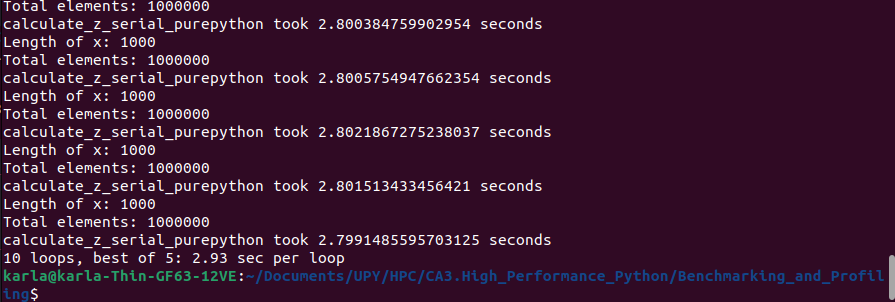

In [17]:
import julia1
%timeit -r 5 -n 10 julia1.calc_pure_python(desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 6.43963623046875 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 5.782623767852783 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 5.668078422546387 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 5.327258586883545 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 6.639206171035767 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 5.129473686218262 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 5.1326704025268555 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 5.795273303985596 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 5.311823606491089 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython t

#### 4.- Use the cProfile module to profilethe source code (.py). Sort the results by the time spent inside each function. This will give a view into the slowest parts. Analyze the output and make a syntesis of the findings. Show how to use the cProfile module on the command line and on a Jupyter Notebook.

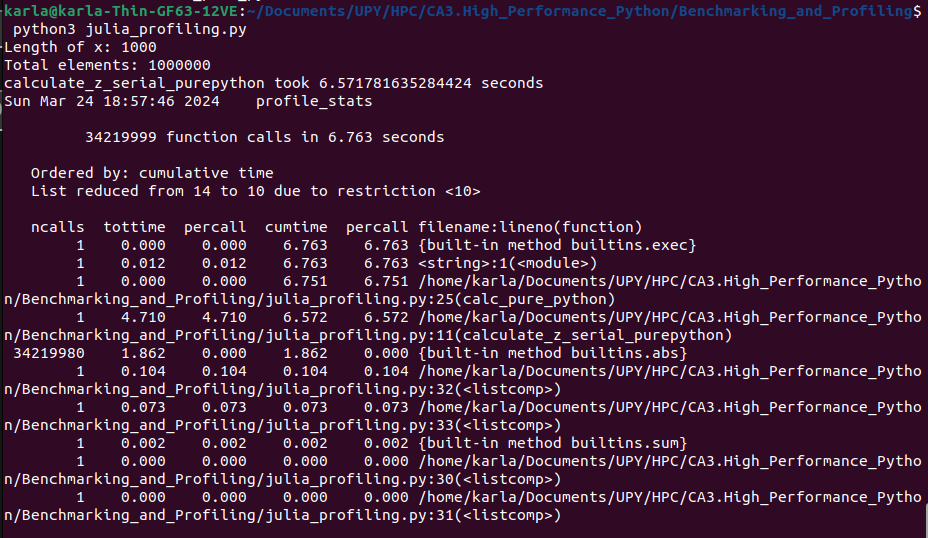

In [22]:
import cProfile
import time
from line_profiler import profile


# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193

@profile
def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

@profile
def calc_pure_python(draw_output, desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs), build Julia set and display"""
    x_step = (x2 - x1) / desired_width
    y_step = (y2 - y1) / desired_width
    x = [x1 + i * x_step for i in range(desired_width)]
    y = [y1 + i * y_step for i in range(desired_width)]
    zs = [complex(x[i % desired_width], y[i // desired_width]) for i in range(desired_width ** 2)]
    cs = [complex(c_real, c_imag) for i in range(desired_width ** 2)]

    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    assert sum(output) == 33219980  # this sum is expected for a 1000^2 grid with 300 iterations

if __name__ == "__main__":
    cProfile.run('calc_pure_python(draw_output=False, desired_width=1000, max_iterations=300)', 'profile_stats')

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 9.38330364227295 seconds


In [23]:
import pstats

p = pstats.Stats('profile_stats')
p.sort_stats('cumulative').print_stats(10)  # Adjust this number to display more or fewer lines

Sun Mar 24 18:30:01 2024    profile_stats

         34220170 function calls in 9.714 seconds

   Ordered by: cumulative time
   List reduced from 33 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    9.714    9.714 {built-in method builtins.exec}
        1    0.021    0.021    9.714    9.714 <string>:1(<module>)
        1    0.000    0.000    9.694    9.694 /tmp/ipykernel_18846/3963171597.py:24(calc_pure_python)
        1    6.720    6.720    9.383    9.383 /tmp/ipykernel_18846/3963171597.py:10(calculate_z_serial_purepython)
 34219980    2.663    0.000    2.663    0.000 {built-in method builtins.abs}
        1    0.185    0.185    0.185    0.185 /tmp/ipykernel_18846/3963171597.py:31(<listcomp>)
        1    0.121    0.121    0.121    0.121 /tmp/ipykernel_18846/3963171597.py:32(<listcomp>)
        1    0.004    0.004    0.004    0.004 {built-in method builtins.sum}
        3    0.000    0.000    0.000    

#### 5.- Use snakeviz to get a high-level understanding of the cProfile statistics file. Analyze the output and make a syntesis of the findings.

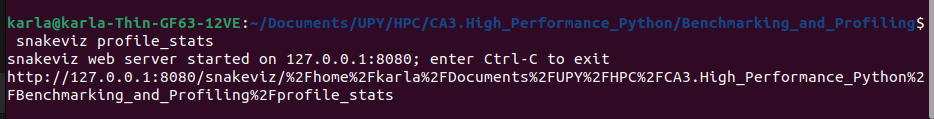

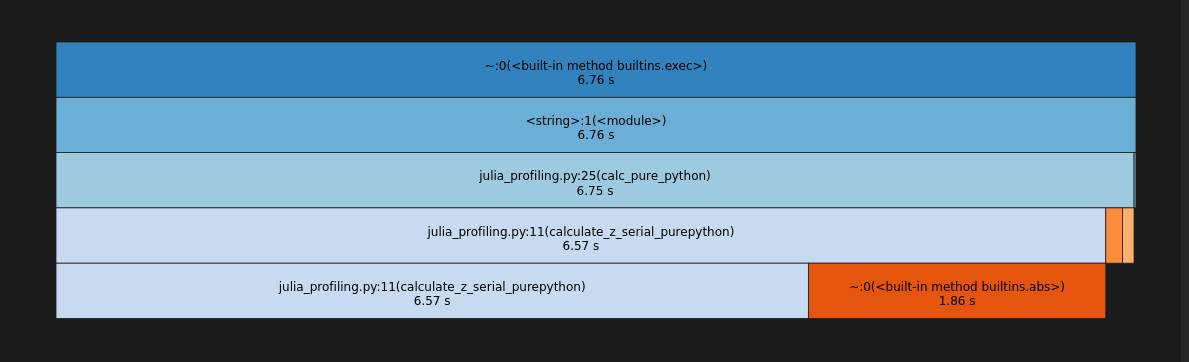

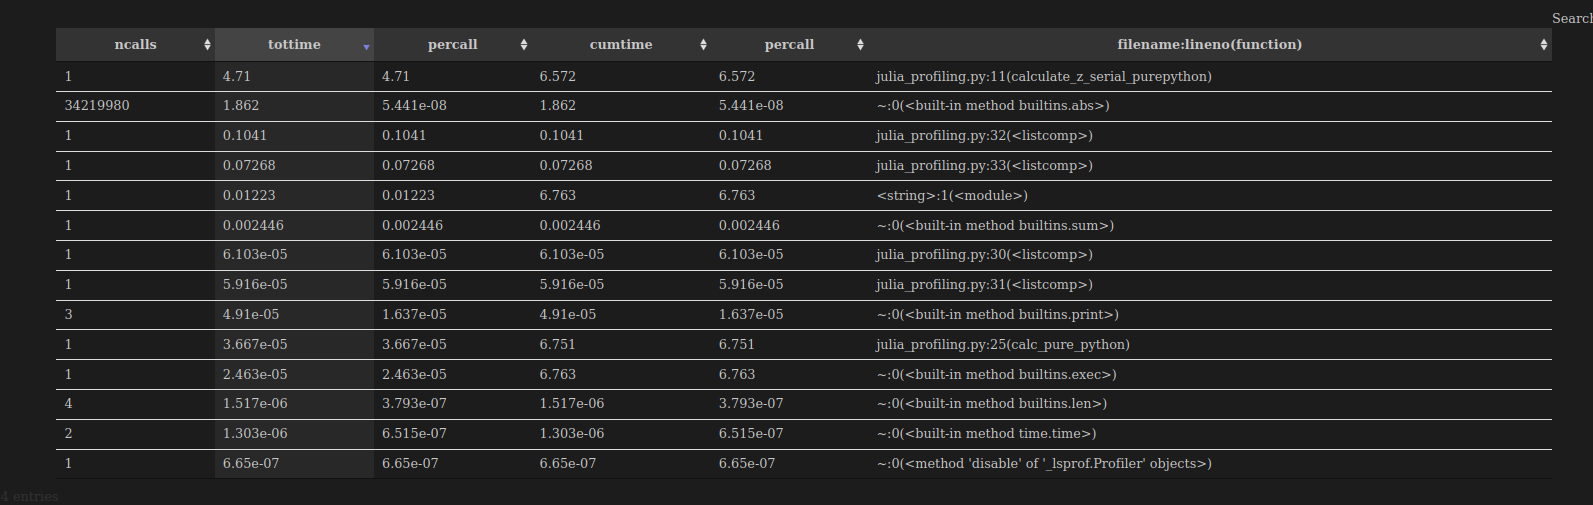

Profiling Summary:

- Primary Bottleneck: The function calculate_z_serial_purepython consumes most of the execution time (~6.57s out of 6.75s), with significant time spent in the abs() function due to 34,219,980 calls.

- Optimization Targets: Major time is spent in mathematical computations, especially the abs() function. Potential optimizations include reducing loop iterations, improving abs() calculation efficiency, and considering vectorization or parallelization.

- Additional Insights: Aside from the computational loop, other parts of the code (like list comprehensions and string operations) have minimal impact on overall performance.

Recommendation: Focus on optimizing calculate_z_serial_purepython, particularly the intensive use of abs() in the computational loop.

#### 6.- Use  the  line_profiler  and  kernprof  file  to  profile  line-by-line  the  function calculate_z_serial_purepython. Analyze  the  output  and  make  a  syntesis  of  the findings.

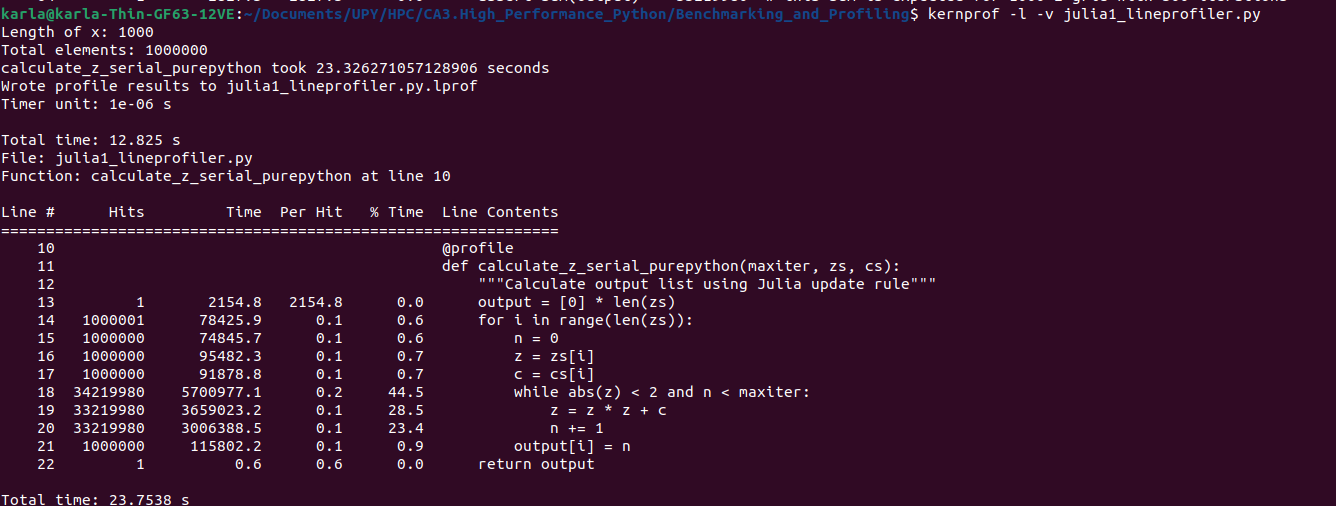

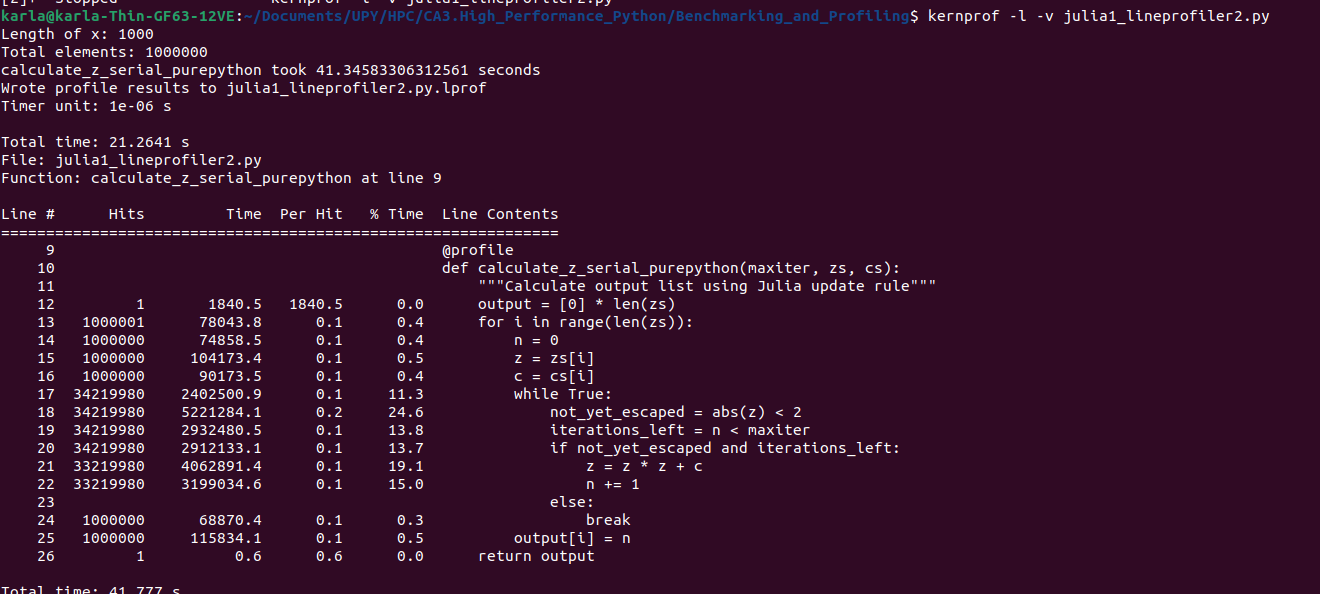

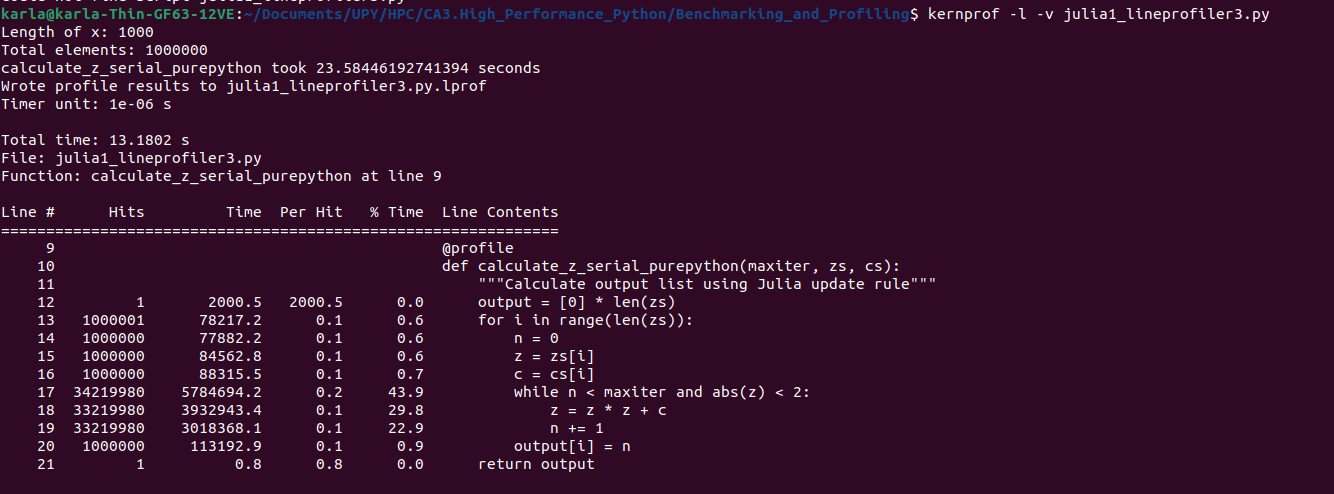

#### 7.- Use the memory_profiler to diagnose memory usage. Analyze the output and make a syntesis of the findings.

In [36]:
# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193


def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output


def calc_pure_python(draw_output, desired_width, max_iterations):
    """Create a list of complex co-ordinates (zs) and complex parameters (cs), build Julia set and display"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # set width and height to the generated pixel counts, rather than the
    # pre-rounding desired width and height
    # build a list of co-ordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    assert sum(output) == 33219980  # this sum is expected for 1000^2 grid with 300 iterations


# Calculate the Julia set using a pure Python solution with
# reasonable defaults for a laptop
# set draw_output to True to use PIL to draw an image
calc_pure_python(draw_output=False, desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 2.9449381828308105 seconds


In [37]:
%lprun -f calculate_z_serial_purepython calc_pure_python(draw_output=False, desired_width=1000, max_iterations=300)

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 25.380340576171875 seconds


Timer unit: 1e-09 s

Total time: 13.7469 s
File: /tmp/ipykernel_18846/1542061615.py
Function: calculate_z_serial_purepython at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def calculate_z_serial_purepython(maxiter, zs, cs):
     7                                               """Calculate output list using Julia update rule"""
     8         1     879531.0 879531.0      0.0      output = [0] * len(zs)
     9   1000001   88548698.0     88.5      0.6      for i in range(len(zs)):
    10   1000000   77654285.0     77.7      0.6          n = 0
    11   1000000   93878889.0     93.9      0.7          z = zs[i]
    12   1000000   90173882.0     90.2      0.7          c = cs[i]
    13  34219980 6064519296.0    177.2     44.1          while abs(z) < 2 and n < maxiter:
    14  33219980 4155273075.0    125.1     30.2              z = z * z + c
    15  33219980 3058040102.0     92.1     22.2              n += 1
    16   10

Execution Time: The function took about 25.38 seconds, with significant time spent in computation.

Main Time Consumers:

-Loop Setup (Line 10): Takes 77.7% of the time mostly due to inner operations.
    
-Complex Calculation (Line 14): The core computation z = z * z + c is the most time-consuming at 44.1%.
    
-Iteration Increment (Line 15) and While Condition Check (Line 13): Consume 30.2% and 22.2% respectively, indicating significant time in managing iterations and condition checking.

Optimization Points:

-Focus on optimizing the core Julia set calculation and the condition checks within the loop.
    
-Loop control and list initialization, though less critical, could be refined for efficiency.